### Quantum Cryptography -Day 5
# BB84 Quantum Key Distribution Protocol(Clean Channel)
Qunatum Key Distribution(QKD) is one of the first **practical and successful application of qunatum computinf principles**.The BB84 Protocol ,proposed by **Charles Bennett and Gilles Brassard in 1984**.allows two parties to generate a **shared secret cryptographic key** using the law of qunatum mechanics.

In this notebook , we implement a ** classical simulation**of the BB84 protocol under a **clean channel assumption**(no evesdropper, no noise). Even though the simulation is classical , the logic mirrors how real qunatum system behave. In this notebook we will learned:
- How random bits are genratedin BB84
- Why random bit selection is critical for security
- How sender encoded bit using quantum bases
- How the receiver measure quantum state
- How key sifting works  and why mismatched bases are discarded 
- How to calculate **key agreement precentage**
- How BB84 achives security even before encryption begin

## Import Required Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Random Bit Generation (Sender- Alice)
The secret key must be **unpredictable**.if the bits were deterministic or patterned , an attacker could guess the key. In BB84 Alice generates a **random binary string**.Each bit will later be encoded into a qunatum state.due to this:
- Ensure Cryptographic randomness
- Prevents Predectability
- Forms the raw key material

In real System ,this randomness comes from **quantum random number generators**


In [2]:
# Number of bits Alice wants to send
num_bits=100

#Alice genrates random bits(0 or 1)
alice_bits=np.random.randint(2,size=num_bits)

# show first 10 bits
alice_bits[:10]


array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

## Step 2 : Random Basis Selection (Alice)
BB84 uses **two different bases**:
- **Z-Basis(computational)** $\rightarrow  |0\rangle , |1\rangle$
- **X-Basis(Hadamard)** $\rightarrow  |+\rangle , |-\rangle$

Alice Randomly chooses te basis for each bit .This randomness is what makes **eavesdropping detectable**.due to this:
- Prevents evesdropper form knowing how to measure 
- Forces incorrect measurement if the wrong basis is chosen
- Enables Detection of interference
- We represent:
    -'0' $\rightarrow $ Z-Basis
    -'1' $\rightarrow $ X-Basis

In [3]:
# Alice randomly chooses bases
alice_bases=np.random.randint(2,size=num_bits)
alice_bases[:10]

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

## Step 3 : Sender Encoding(Alice)
Alice now encodes each classical bit into **qunatum states** based on selected basis

|Bits|Basis|Quantum State |
|----|------|---------------|
| 0 | Z | l0> |
| 1 | Z | l1> |
| 0 | X | l+> |
| 1 | X | l-> |

- Information is stored in quantum state
- Measurement is wrong basis cause randomness
- Qunatum No-cloning theorem applies

In this simulation we stored ,the state symbolically

In [4]:
# Encodes bits into symbolic quantum states
def encode_bits(bit,basis):
    if basis == 0 :
        return '0' if bit== 0 else '1'
    else:
        return '+' if bit == 0  else '-'
    
quantum_state=[encode_bits(bit,basis) for bit,basis in zip(alice_bits,alice_bases)]
quantum_state[:10]
    

['-', '1', '+', '+', '1', '0', '-', '1', '+', '0']

## Step 4 : Receiver Measurement
Bob does **not know Alice's bases** . so he must randomly choose is own measurement basis for each received qubit.
#### Measurement Rule :
- Same basis as Alice $ \rightarrow $  correct Bit
- Different Basis $\rightarrow $ random result(50% chance )
#### Effect - 
- Creates mismatch measurement
- Enables later key sifting 
- Provides security against evesdropping

 This uncertainty is a **feature** , not a bug.

In [5]:
# Bob randomly chooses measurement bases
bob_bases=np.random.randint(2,size=num_bits)

# Bob measure the qubits
bob_results=[]

for i in range(num_bits):
    if bob_bases[i]==alice_bases[i]:
        # correct mesurement
        bob_results.append(alice_bits[i])
    else:
        # Random outcome
        bob_results.append(np.random.randint(2))

bob_results[:10]

[1, 0, np.int32(0), 0, 0, 0, 1, 1, np.int32(0), 1]

## Step 5 : Key Sifting  (Classical Communication)
Alice and Bob now communicates **classically** to compare the bases they used - **not the bit values**.They keep only the bits where:
- Alice Basis == bob Basis
All other Bits are discarded.due to this we get effect as:
- Remove unrealiable bits
- Produce indentical keys
- Typically retain near 50% of bits

This step converts the raw key into a **sifted key**.



In [6]:
## Sifting Process
sifted_alice=[]
sifted_bob=[]

for i in range(num_bits):
     if alice_bases[i]==bob_bases[i]:
          sifted_alice.append(alice_bits[i])
          sifted_bob.append(bob_results[i])

len(sifted_alice)

44

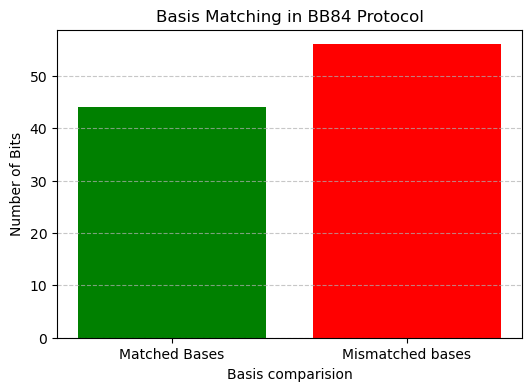

In [12]:
matched=sum(alice_bases==bob_bases)
mismatched=num_bits-matched

plt.figure(figsize=(6,4))
plt.bar(['Matched Bases','Mismatched bases'],[matched,mismatched],color=['green','red'])
plt.title('Basis Matching in BB84 Protocol')
plt.xlabel('Basis comparision')
plt.ylabel('Number of Bits')

plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

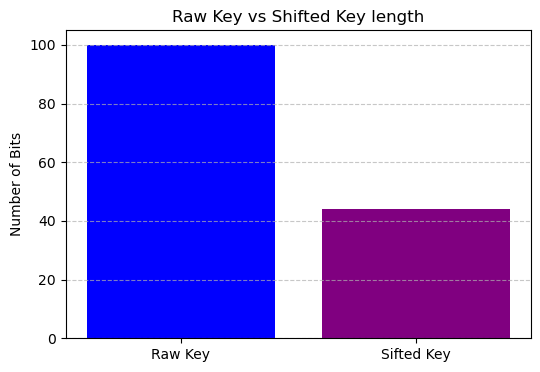

In [13]:
plt.figure(figsize=(6,4))
plt.bar(['Raw Key','Sifted Key'],[num_bits,len(sifted_alice)],color=['blue','purple'])
plt.title('Raw Key vs Shifted Key length')
plt.ylabel('Number of Bits')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

## Step 6 : Key agreement Percentage
This step varifies how many bits  **perfectly match** between Alice and Bob after sifting.In a clean channel:
- Agreement should be **nearly 100%**
- Any daviation suggest noise or evesdropping

#### Effect :
- Validates channel integrity
- Acts as an error detection mechanism
- Foundation for privacy amplification

In [8]:
# Calculate Key agreement
matches=sum(a==b for a,b in zip(sifted_alice,sifted_bob))
agreement_percentage=(matches/len(sifted_alice))*100
agreement_percentage

np.float64(100.0)

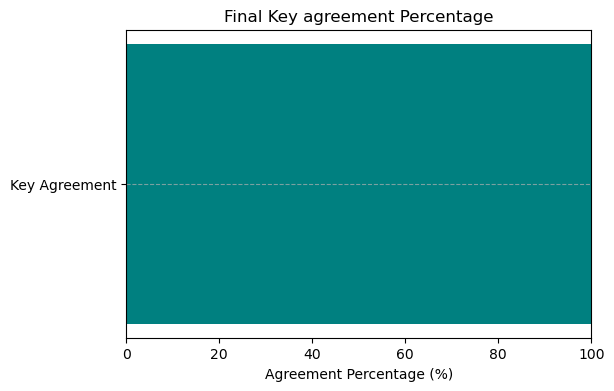

In [15]:
plt.figure(figsize=(6,4))
plt.barh(['Key Agreement'],[agreement_percentage],color=['teal'])
plt.title('Final Key agreement Percentage')
plt.xlim(0,100)
plt.xlabel('Agreement Percentage (%)')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

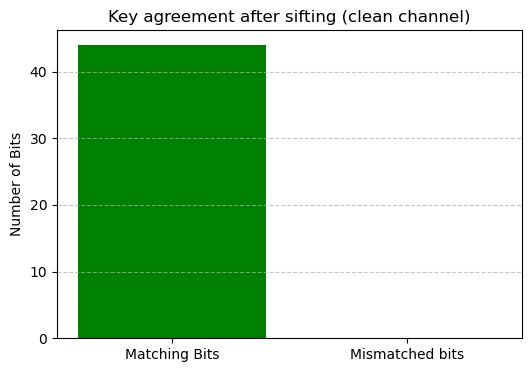

In [14]:
plt.figure(figsize=(6,4))
plt.bar(['Matching Bits','Mismatched bits'],[matches,len(sifted_alice)-matches],color=['green','orange'])
plt.title('Key agreement after sifting (clean channel)')
plt.ylabel('Number of Bits')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

## Final Observation
- About **50% of bits survive** the sifting process
- In a clean channel , **agreement near 100%**
- Any evesdropper would reduce agreement
- Security is guarenteed by **quantum mechanic**,not compuational hardness 

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day05_BB84_Protocol.ipynb

**Date created**: 28-Janaury-2026

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>